In [1]:
from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image
%matplotlib inline

C:\Users\pengu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pengu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pengu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pengu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
dfPokemon = pd.read_csv("pokemon.csv") #this is reading in our dataset of the Pokemon and their types
dfPokemon.head() #visualization of the data

,Name,Type1,Type2
0,abomasnow,Grass,Ice
1,abra,Psychic,NaN
2,absol,Dark,NaN
3,accelgor,Bug,NaN
4,aegislash-blade,Steel,Ghost


In [3]:
def createType(row): #this is a function to make a new column in the dataset with the combination of type1 and type2 into an
    if row['Type2']=='None': #overall type. If there is no secondary type it just returns the primary type
        return row['Type1']
    return '-'.join([row['Type1'], row['Type2']]) #otherwise it adds the types together and returns that

In [4]:
dfPokemon['Type2'].fillna('None', inplace=True) #This replaces the NAs in the dataset with None to improve clarity
dfPokemon['Type'] = dfPokemon.apply(lambda row: createType(row), axis=1) #then we create the type column using the above function
dfPokemon.head() #and create a new visualization

,Name,Type1,Type2,Type
0,abomasnow,Grass,Ice,Grass-Ice
1,abra,Psychic,None,Psychic
2,absol,Dark,None,Dark
3,accelgor,Bug,None,Bug
4,aegislash-blade,Steel,Ghost,Steel-Ghost


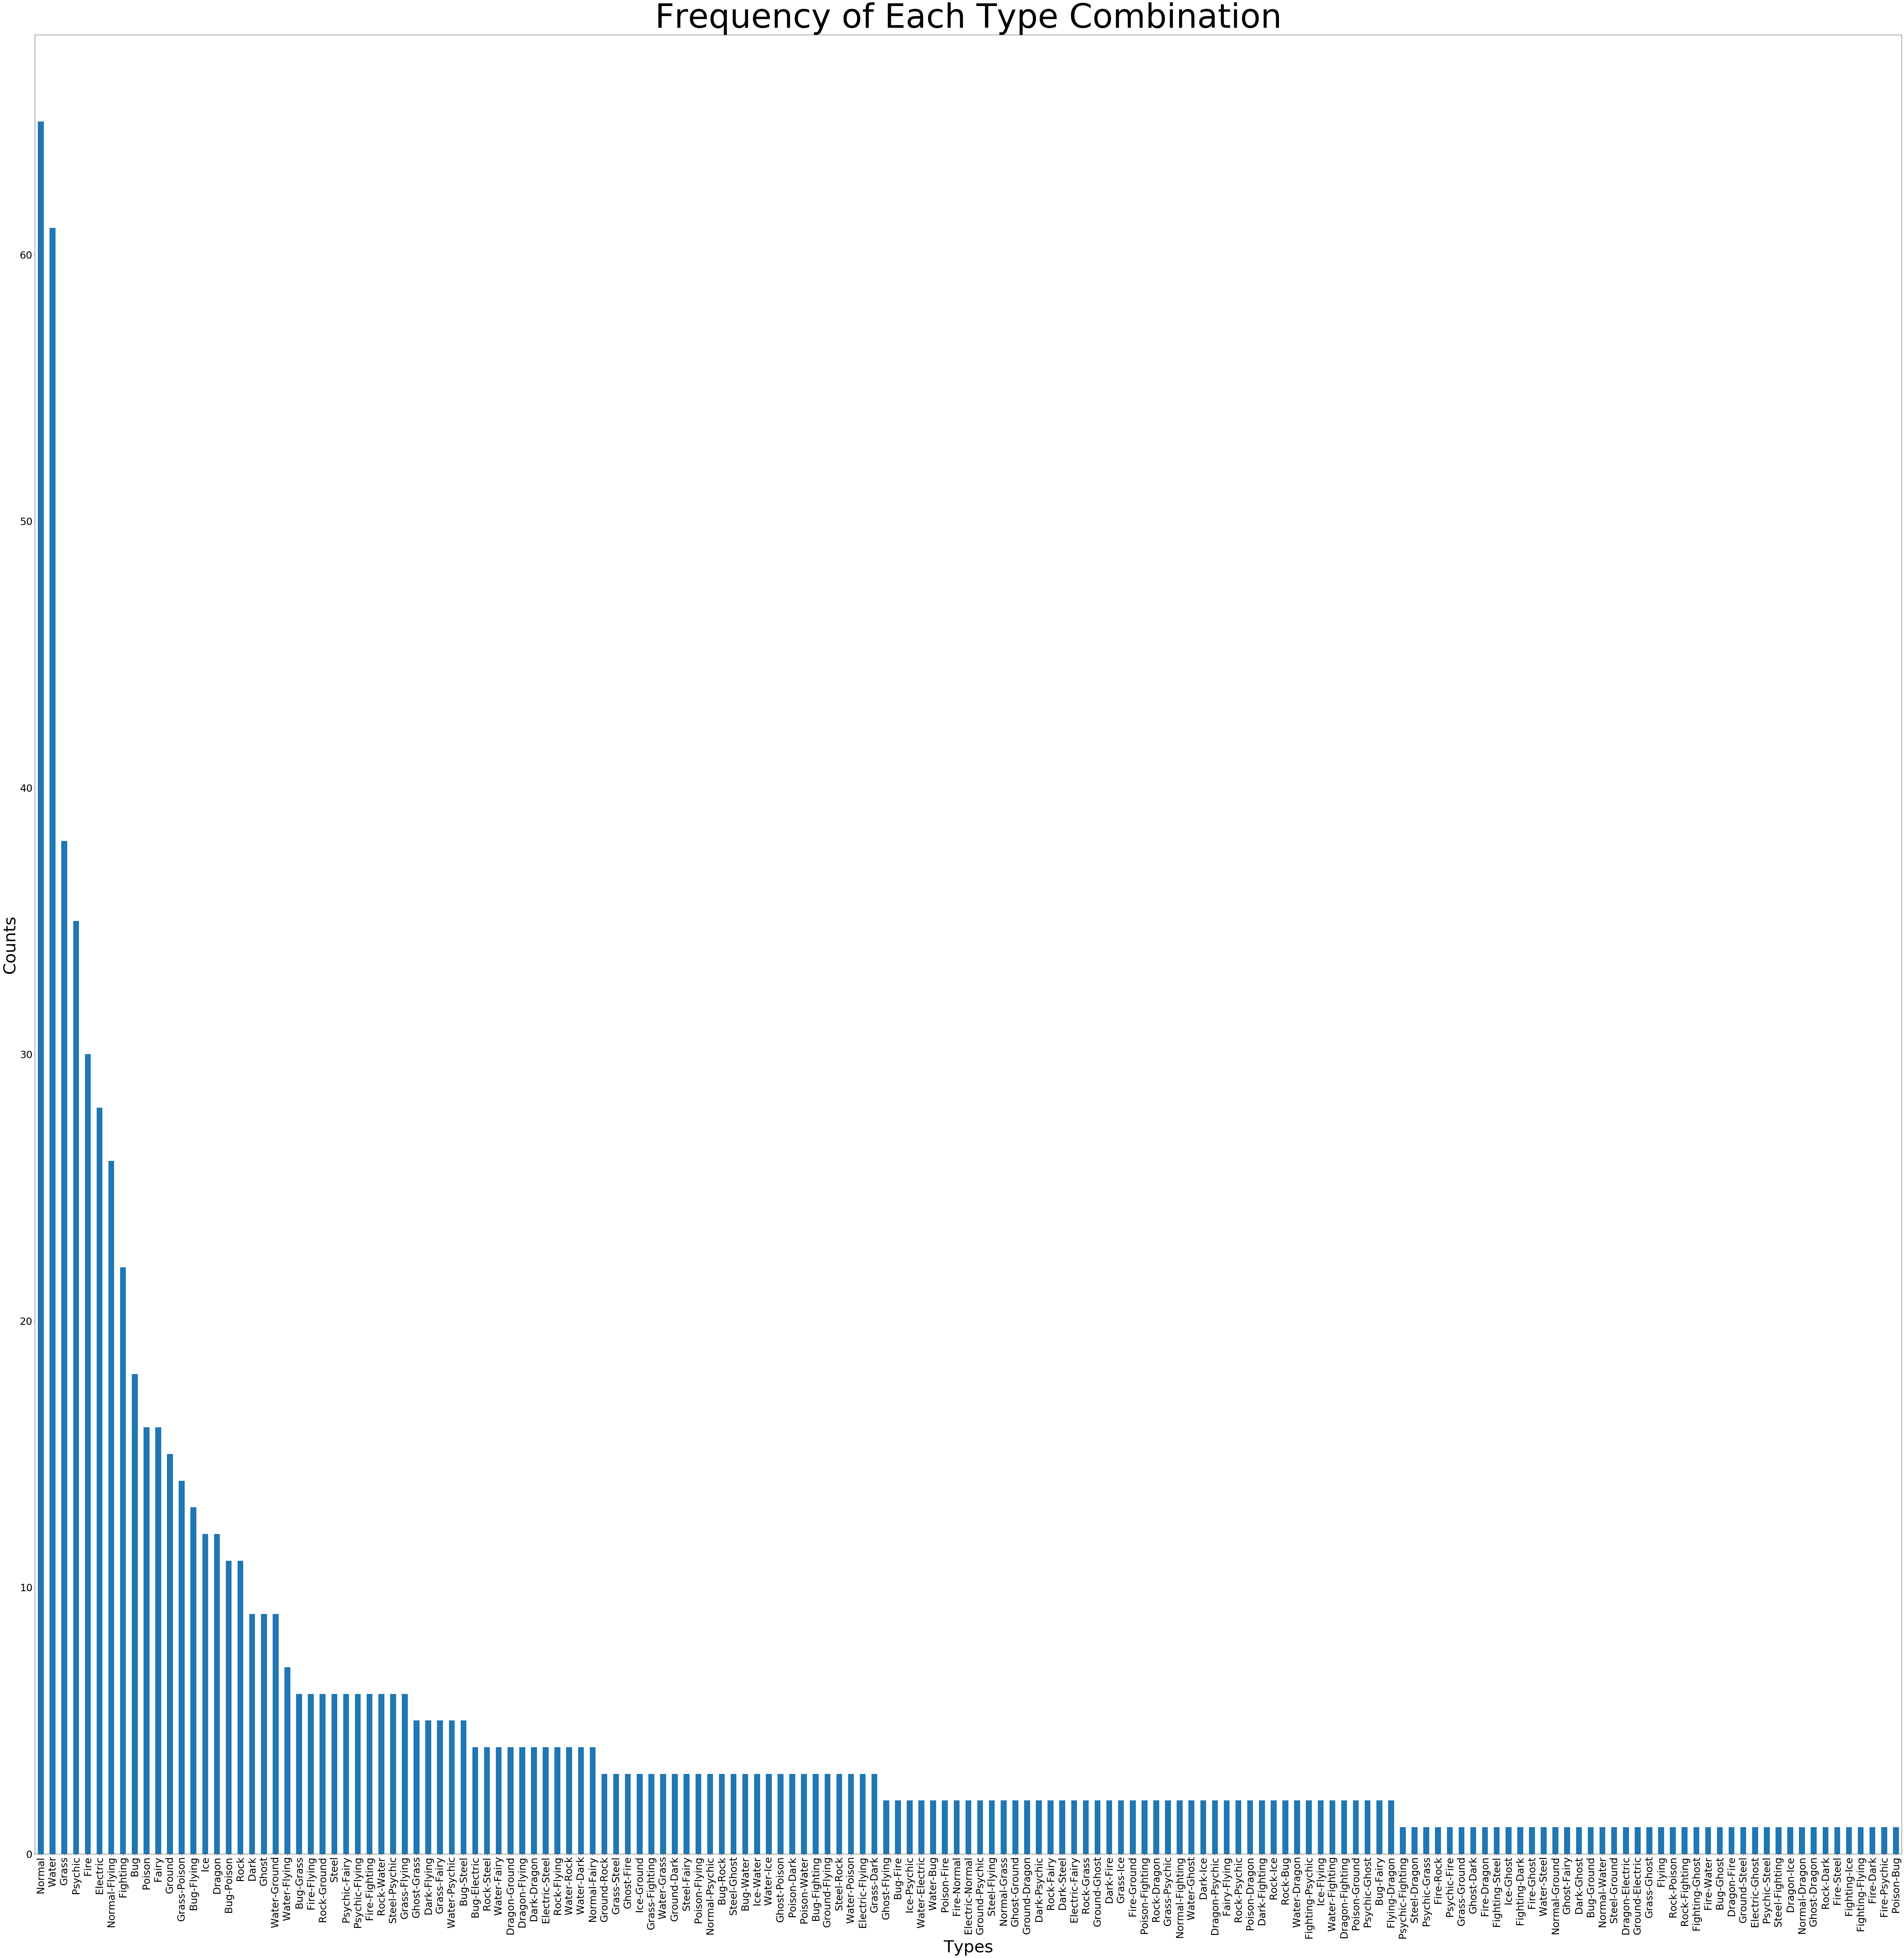

In [5]:
#in this cell we were exploring the frequency of each type combination (the third column)
#We created a bar plot and enlarged it so that the types could be seen properly
ax = dfPokemon["Type"].value_counts().plot.bar(title = "Frequency of Each Type Combination", figsize = (100,100))
ax.set_xlabel("Types", size = 50)
ax.set_ylabel("Counts", size = 50)
ax.set_title("Frequency of Each Type Combination", size = 100)
ax.tick_params(labelsize = 30)

Text(0, 0.5, 'Counts')

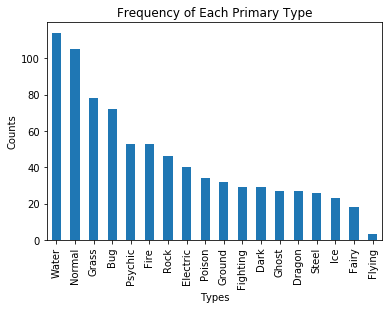

In [6]:
#in this cell we are making a plot of the frequency of the primary types
ax = dfPokemon["Type1"].value_counts().plot.bar(title = "Frequency of Each Primary Type")
ax.set_xlabel("Types")
ax.set_ylabel("Counts")

Text(0, 0.5, 'Counts')

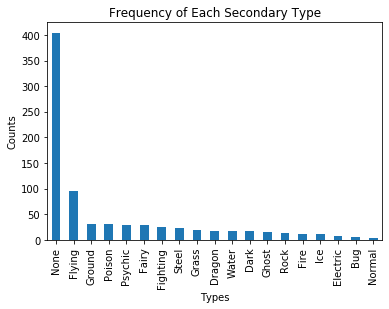

In [7]:
#in this cell we are making a plot of the frequency of the secondary types
ax = dfPokemon["Type2"].value_counts().plot.bar(title = "Frequency of Each Secondary Type")
ax.set_xlabel("Types")
ax.set_ylabel("Counts")

404
[49.93819530284301, 50.06180469715699]


(-1.1005282157059084,
 1.1000251531288527,
 -1.1002917126258744,
 1.1005505262042747)

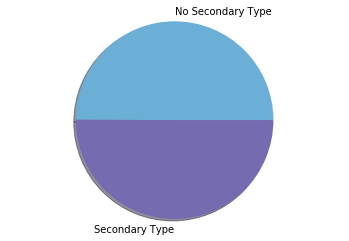

In [58]:
#in this cell we wanted to create a pie chart of the pokemon with a secondary type vs. without 
temp = dfPokemon.loc[dfPokemon["Type2"]== "None"] #we created new variables with just the pokemon with no secondary type
temp2 = dfPokemon.loc[dfPokemon["Type2"] != "None"] # and with a secondary type
print(len(temp))
total = len(temp) + len(temp2) #this is the sum of the total number of pokemon
sizes = []
tempp = len(temp)/total #this is the proportion of the pokemon that have no secondary type
sizes.append(tempp*100) #this is the percentage of the pokemon that have no secondary type
tempp2 = len(temp2)/total #this is the proportion of the pokemon with a secondary type 
sizes.append(tempp2 * 100) #this is the percentage of the pokemon with a secondary type
explode = [0,0] #explode gives us the option of having one of the wedges separated from the piechart. 
#both values are 0 becaues this is not necessary in our case given we have two categories 

cmap = plt.get_cmap("tab20c") #this imports the color mappings table
print(sizes) 
fig1,ax1 = plt.subplots() 
labels = "No Secondary Type", "Secondary Type"
ax1.pie(sizes,  explode=explode, labels=labels, shadow = True, colors=cmap([1,12])) #creates a pie chart with labels and colors
ax1.axis('equal')

(120, 120, 4)


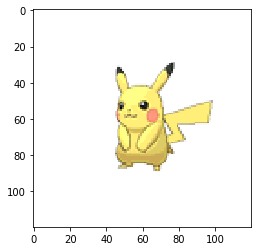

In [23]:
img = mpimg.imread('images/pikachu.png') #this is to visualize the images themselves 
print(img.shape)
plt.imshow(img)

In [48]:
#in this cell we are converting Type1 and Type2 into categorical variables so that we can cast them as numbers 
from scipy.stats import chi2_contingency
df2 = dfPokemon.copy()

df2["Type1"] = df2["Type1"].astype("category")
df2['Type1_cat'] = df2['Type1'].cat.codes
df2["Type2"] = df2["Type2"].astype("category")
df2['Type2_cat'] = df2['Type2'].cat.codes

temp1 = df2["Type1_cat"].tolist()
temp2 = df2["Type2_cat"].tolist()
table = [temp1, temp2] #this is a table to run statistical tests on

df2.head(20) #visualization of the new dataset with the numerical values

,Name,Type1,Type2,Type,Type1_cat,Type2_cat
0,abomasnow,Grass,Ice,Grass-Ice,9,11
1,abra,Psychic,None,Psychic,14,12
2,absol,Dark,None,Dark,1,12
3,accelgor,Bug,None,Bug,0,12
4,aegislash-blade,Steel,Ghost,Steel-Ghost,16,8
5,aerodactyl,Rock,Flying,Rock-Flying,15,7
6,aggron,Steel,Rock,Steel-Rock,16,16
7,aipom,Normal,None,Normal,12,12
8,alakazam,Psychic,None,Psychic,14,12
9,alomomola,Water,None,Water,17,12


In [62]:
#this is a chi2 test to determine if the columns are dependent or independent 
#In order to see the p-value fully I read out 160 decimial places.
#As we can see, Type1 and Type2 are likely to be dependent which makes sense givne our dataset, and 
#also reinforces the idea that we should focus on the first type when comparing to the images,
#otherwise we could experience problems resulting from the dependencies between the columns

stat, p , dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.160f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=2377.829, p=0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000003214851
Probably dependent


In [54]:
#this is a T-Test to determine how similar the distributions are for Type1 and Type2. 
#I thought this would be interesting to look further into how the columns are related and the Type1 and Type2 relationship
#as we can see, the distributions are likely ro be different, so the differences in the means are not likely to be 
#coincidental. This makes sense given the nature of our dataset, the designers of pokemon are unlikely to have
#wanted a similar distribution of Type1s and Type2, and this makes sense given our visualizations of the datasets from
#earlier.


from scipy.stats import ttest_ind

stat, p = ttest_ind(temp1,temp2)
print('stat=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-3.954, p=0.000080064
Probably different distributions
